# Data Scinece Task for GazaSkyGeeks

1. The first step is to load the top 1000 movies into a **panads dataframe**

In [1]:
import pandas as pd

topRated = pd.read_csv('data/imdb_top_1000.csv')
topRated.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


2. Now I will clean the data: 
    * First, I want to remove rows that have null values. I will use the function **dropna** to do that.
    * then I want to drop the unnecessary columns using the **drop** function. So based on the task and the analysis I want to perform on the data, I decided to remove the following columns: <br>
    *'Poster_Link', 'Certificate', 'Runtime', 'Overview', 'Meta_score', 'Star2', 'Star3', 'Star4', 'Gross'*.<br>
    Because I will not be working on them, I considered them unnecessary.
        

In [2]:
unnecessary_columns = ['Poster_Link', 'Certificate', 'Runtime', 'Overview',
                        'Meta_score', 'Star2', 'Star3', 'Star4', 'Gross']
topRated = topRated.drop(unnecessary_columns, axis=1)
topRated = topRated.dropna()
topRated.head()

,Series_Title,Released_Year,Genre,IMDB_Rating,Director,Star1,No_of_Votes
0,The Shawshank Redemption,1994,Drama,9.3,Frank Darabont,Tim Robbins,2343110
1,The Godfather,1972,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,1620367
2,The Dark Knight,2008,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,2303232
3,The Godfather: Part II,1974,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,1129952
4,12 Angry Men,1957,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,689845


3. To see the most popular genres of movies and TV shows, I will use the following code:

In [3]:
genreCounts = topRated.Genre.value_counts()
mostPopulerGenre = genreCounts.idxmax()
print(genreCounts.head())
print('The most populer genre: ', mostPopulerGenre)

Genre
Drama                     85
Drama, Romance            37
Comedy, Drama             35
Comedy, Drama, Romance    31
Action, Crime, Drama      30
Name: count, dtype: int64
The most populer genre:  Drama


4. Now I will create a new dataframe that contains the count of movies/TV shows in each genre:

In [4]:
genreCounts = topRated.Genre.value_counts().reset_index()
genreCounts.columns = ['Genre', 'Counts']
genreCounts.head()

,Genre,Counts
0,Drama,85
1,"Drama, Romance",37
2,"Comedy, Drama",35
3,"Comedy, Drama, Romance",31
4,"Action, Crime, Drama",30


5. The visualization of the top genres (I will show the first 60 genres to keep the chart readable):

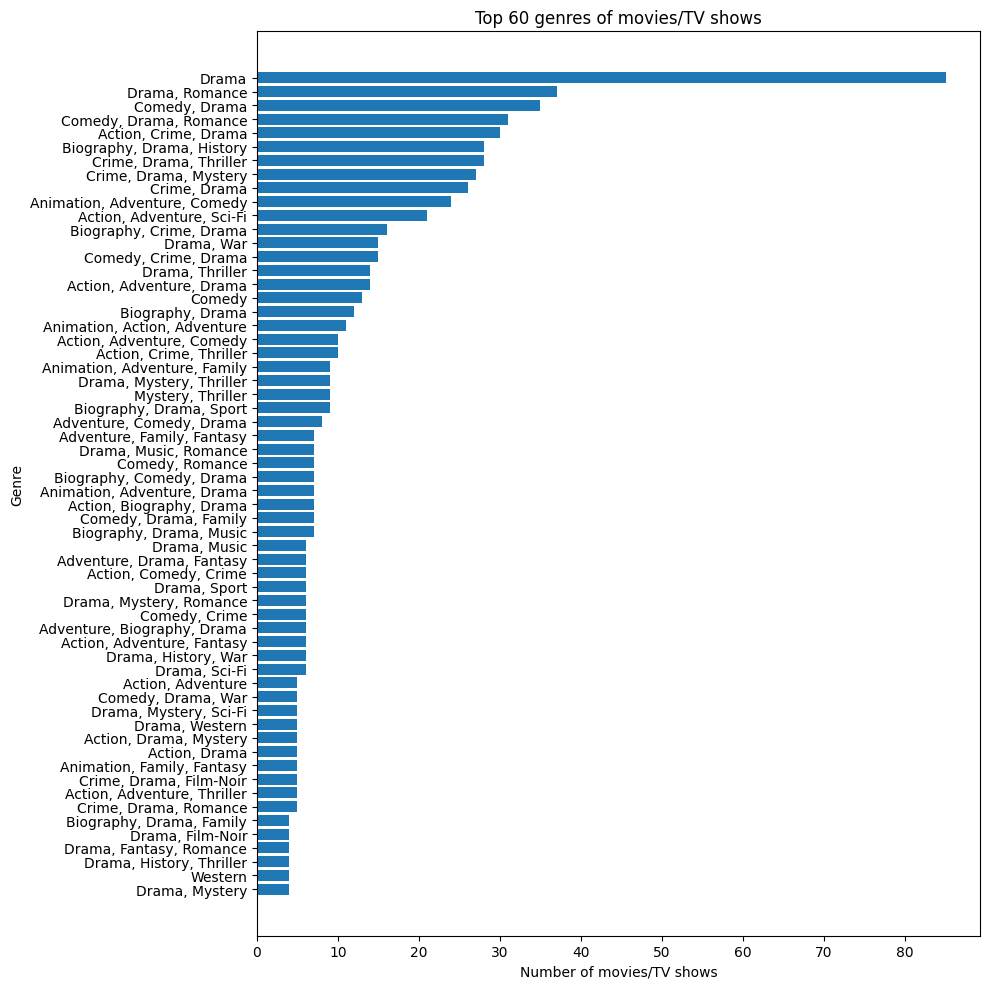

In [5]:
import matplotlib.pyplot as plt

top60Genres = genreCounts.sort_values('Counts', ascending=False)
top60Genres = top60Genres.head(60)

topGenre = top60Genres.Genre[::-1]
topCounts = top60Genres.Counts[::-1]

plt.figure(figsize=(10, 10))
plt.barh(topGenre, topCounts)
plt.xlabel('Number of movies/TV shows')
plt.ylabel('Genre')
plt.title('Top 60 genres of movies/TV shows')
plt.xticks()
plt.tight_layout()
plt.show()

6. The director with the most top-rated movies/TV shows:

In [6]:
directorCounts = topRated.Director.value_counts().reset_index()
directorCounts.columns = ['Director', 'Counts']
directorCounts.head()

,Director,Counts
0,Alfred Hitchcock,14
1,Steven Spielberg,13
2,Hayao Miyazaki,11
3,Martin Scorsese,10
4,Akira Kurosawa,10


7. The visualization of the directors with the most top-rated movies/TV shows (again, I will show only 60 directors to keep the 
chart readable):

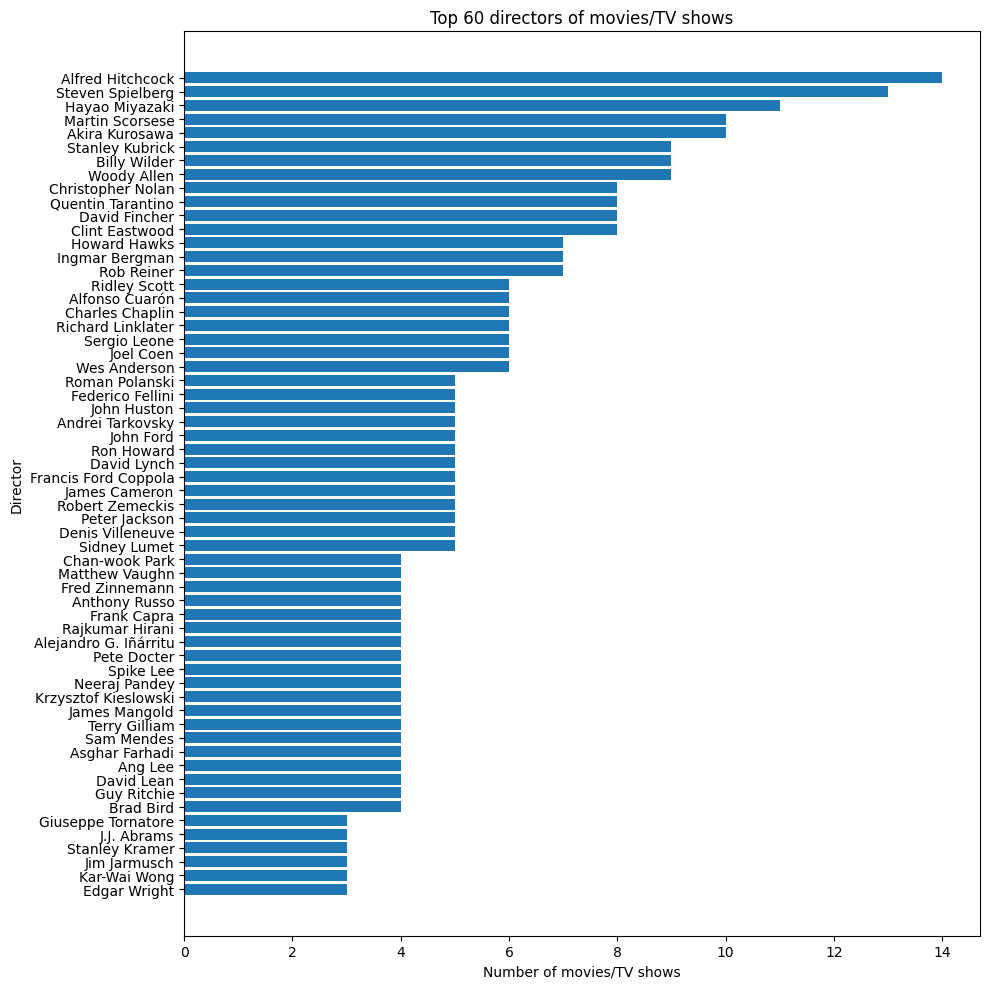

In [7]:
import matplotlib.pyplot as plt

directorCounts = directorCounts.sort_values('Counts', ascending=False)
top60Directors = directorCounts.head(60)

topDirectors = top60Directors.Director[::-1]
topDirectorsCounts = top60Directors.Counts[::-1]

plt.figure(figsize=(10, 10))
plt.barh(topDirectors, topDirectorsCounts)
plt.xlabel('Number of movies/TV shows')
plt.ylabel('Director')
plt.title('Top 60 directors of movies/TV shows')
plt.xticks()
plt.tight_layout()
plt.show()

### The Report

In this case study, we looked at a dataset from IMDb that contained data of the top 1000 movies and TV shows. Our goals were to determine the most popular movies/TV shows genres as well as directors with the greatest number of top-rated productions, and to visulize the results of each process.


#### Analysis: 

1.  **Popular Genres**

    * We created a new dataframe with the number of films and TV shows in each genre to identify the most popular genre.

    * From the analysis, we found that *drama* is the most popular genre, with *85* movies and TV shows belonging to this category.

2.  **Top Directors**
    
    * We also looked into the directors with the highest count of top-rated movies/TV shows.

    * By creating a new dataframe with the count of movies/TV shows directed by each director, we were able to identify the directors with the most top-rated productions.

    * The director *Alfred Hitchcock* emerged as the top director with *14* movies/TV shows under his direction, demonstrating his prominence in the industry.

#### Analysis: 

1.  **Data Cleaning:** The data cleaning step was essential to ensuring the quality and integrity of the dataset. By removing unnecessary columns and handling missing values, we were able to focus on the relevant variables and eliminate potential biases or inconsistencies in our analysis.

2.  **Enhancing understanding with Data Visualization:** The use of bar charts to visualize genre counts and director counts improved the comprehension and presentation of our findings. Visual representations make it easier to identify patterns, compare values, and convey information effectively. It demonstrates the significance of data visualization in conveying insights to stakeholders and facilitating decision-making processes.

3.  **Potential Deeper Analysis:** While our analysis provided initial insights, there is still room for further exploration. For example, examining the relationship between genre popularity and IMDb ratings could reveal if highly-rated movies/TV shows tend to belong to certain genres. Exploring additional variables such as runtime or star cast could uncover further insights into factors that contribute to success in the industry.

Overall, this data analysis task provided me with a practical understanding of the value and relevance of data analysis in real-world scenarios. By working with the top 1000 movies/TV shows dataset, I experienced firsthand how data analysis techniques can help uncover valuable insights and drive informed decision-making. The process of cleaning the data, analyzing popular genres, and identifying influential directors demonstrated the power of data-driven insights in understanding audience preferences and industry dynamics. This hands-on experience highlighted the practical application of data analysis skills and deepened my appreciation for the role they play in extracting meaningful information and driving successful outcomes in various domains.